# Análisis y visualización de datos de Tokyo_Airbnb 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" style= "height:150px;float:left;">

### Fases

#### 1. Descripción de los datos

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from IPython.display import HTML
import plotly.io as pio

In [28]:
#leer datos
datos = pd.read_csv('tokyo_airbnb.csv')

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [26]:
datos.describe()

id       host_id      latitude     longitude         price  \
count  1.146600e+04  1.146600e+04  11466.000000  11466.000000  1.146600e+04   
mean   2.640545e+07  1.399776e+08     35.687159    139.734537  1.498470e+04   
std    7.565212e+06  8.064289e+07      0.217853      0.092771  3.327345e+04   
min    3.530300e+04  1.519770e+05     27.072330    139.130020  0.000000e+00   
25%    2.215251e+07  5.783171e+07     35.679620    139.698975  6.026000e+03   
50%    2.841873e+07  1.502326e+08     35.701910    139.729165  1.000700e+04   
75%    3.222416e+07  2.135896e+08     35.724215    139.784270  1.721600e+04   
max    3.608660e+07  2.714130e+08     35.832430    142.202880  1.000046e+06   

       minimum_nights  number_of_reviews  reviews_per_month  
count    11466.000000       11466.000000       11466.000000  
mean         3.316239          26.028868           1.931624  
std          7.766766          38.455449           1.798866  
min          1.000000           0.000000           0.000000  
25%          1.000000           2.000000           0.530000  
50%          1.000000          12.000000           1.720000  
75%          2.000000          32.000000           3.000000  
max        180.000000         453.000000          51.210000

##### etc.....

#### 2. Verificar calidad de datos

##### etc.....

#### 5. Limpiar datos (amputación e imputación)

##### etc.....

#### 6. Construir el modelo

##### etc.....

#### 7. Evaluar el modelo

##### etc.....

#### 8. Evaluar los resultados

##### etc.....

# Exploración básica del dataset

In [3]:
datos

id                                               name    host_id  \
0         35303  La Casa Gaienmae C Harajuku, Omotesando is nearby     151977   
1        197677                          Oshiage Holiday Apartment     964081   
2        289597                  Private apt in central Tokyo #203     341577   
3        370759  Cozy flat #203, local area YET 10 mins to shib...    1573631   
4        700253                  Private apt in central Tokyo #201     341577   
...         ...                                                ...        ...   
11461  36083287  1min to station · Skytree/Tatami hotel/new design  235406925   
11462  36083512    Asakusa Wired house 5pax near by UENO/AKIHABARA  267481408   
11463  36084566                                             东京精品民宿  161702799   
11464  36085357  #4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...  208189463   
11465  36086604               103号室:立地最高!駅近･買い物便利!改装したばかりの綺麗な和室です｡  254667806   

                 host_name  neighbourhood_group neighbourhood  latitude  \
0                   Miyuki                  NaN    Shibuya Ku  35.67152   
1          Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2                 Hide&Kei                  NaN     Nerima Ku  35.74267   
3      Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66344   
4                 Hide&Kei                  NaN     Nerima Ku  35.74264   
...                    ...                  ...           ...       ...   
11461            Sayoko佐代子                  NaN     Sumida Ku  35.70862   
11462              Hyongsu                  NaN      Taito Ku  35.72464   
11463                 Yang                  NaN    Toshima Ku  35.73587   
11464              Shotaro                  NaN    Edogawa Ku  35.66255   
11465                  新東明                  NaN   Shinjuku Ku  35.69889   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      139.71203     Private room   4196              28                 18   
1      139.82596  Entire home/apt  10975               3                156   
2      139.65810  Entire home/apt   4196              30                107   
3      139.65593  Entire home/apt   6994              29                 99   
4      139.65832  Entire home/apt   3981              30                101   
...          ...              ...    ...             ...                ...   
11461  139.81393  Entire home/apt  21951               1                  0   
11462  139.78078  Entire home/apt   7747               1                  0   
11463  139.73397     Private room  56275               1                  0   
11464  139.87236  Entire home/apt   6456               1                  0   
11465  139.70544     Private room   7962               2                  0   

      last_review  reviews_per_month  
0      2018-07-28               0.20  
1      2019-05-21               1.65  
2      2019-05-25               1.25  
3      2019-05-07               1.55  
4      2019-05-03               1.24  
...           ...                ...  
11461         NaN                NaN  
11462         NaN                NaN  
11463         NaN                NaN  
11464         NaN                NaN  
11465         NaN                NaN  

[11466 rows x 14 columns]

#### Descubierto por una simple descripción de los datos:

##### 1.Hay 14 columnas de características en total, cada una con11466 datos.
##### 2.Hay 4 columnas con algún grado de falta (host_name/neighbourhood_group/last_review/reviews_per_month)

In [5]:
datos['host_name'].fillna(0,inplace = True)

In [6]:
datos['last_review'].fillna(0,inplace = True)

In [7]:
datos['reviews_per_month'].fillna(0,inplace = True)

In [8]:
datos = datos.drop(columns='neighbourhood_group')
datos

id                                               name    host_id  \
0         35303  La Casa Gaienmae C Harajuku, Omotesando is nearby     151977   
1        197677                          Oshiage Holiday Apartment     964081   
2        289597                  Private apt in central Tokyo #203     341577   
3        370759  Cozy flat #203, local area YET 10 mins to shib...    1573631   
4        700253                  Private apt in central Tokyo #201     341577   
...         ...                                                ...        ...   
11461  36083287  1min to station · Skytree/Tatami hotel/new design  235406925   
11462  36083512    Asakusa Wired house 5pax near by UENO/AKIHABARA  267481408   
11463  36084566                                             东京精品民宿  161702799   
11464  36085357  #4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...  208189463   
11465  36086604               103号室:立地最高!駅近･買い物便利!改装したばかりの綺麗な和室です｡  254667806   

                 host_name neighbourhood  latitude  longitude  \
0                   Miyuki    Shibuya Ku  35.67152  139.71203   
1          Yoshimi & Marek     Sumida Ku  35.71721  139.82596   
2                 Hide&Kei     Nerima Ku  35.74267  139.65810   
3      Gilles,Mayumi,Taiki   Setagaya Ku  35.66344  139.65593   
4                 Hide&Kei     Nerima Ku  35.74264  139.65832   
...                    ...           ...       ...        ...   
11461            Sayoko佐代子     Sumida Ku  35.70862  139.81393   
11462              Hyongsu      Taito Ku  35.72464  139.78078   
11463                 Yang    Toshima Ku  35.73587  139.73397   
11464              Shotaro    Edogawa Ku  35.66255  139.87236   
11465                  新東明   Shinjuku Ku  35.69889  139.70544   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room   4196              28                 18  2018-07-28   
1      Entire home/apt  10975               3                156  2019-05-21   
2      Entire home/apt   4196              30                107  2019-05-25   
3      Entire home/apt   6994              29                 99  2019-05-07   
4      Entire home/apt   3981              30                101  2019-05-03   
...                ...    ...             ...                ...         ...   
11461  Entire home/apt  21951               1                  0           0   
11462  Entire home/apt   7747               1                  0           0   
11463     Private room  56275               1                  0           0   
11464  Entire home/apt   6456               1                  0           0   
11465     Private room   7962               2                  0           0   

       reviews_per_month  
0                   0.20  
1                   1.65  
2                   1.25  
3                   1.55  
4                   1.24  
...                  ...  
11461               0.00  
11462               0.00  
11463               0.00  
11464               0.00  
11465               0.00  

[11466 rows x 13 columns]

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11466 non-null  int64  
 1   name               11466 non-null  object 
 2   host_id            11466 non-null  int64  
 3   host_name          11466 non-null  object 
 4   neighbourhood      11466 non-null  object 
 5   latitude           11466 non-null  float64
 6   longitude          11466 non-null  float64
 7   room_type          11466 non-null  object 
 8   price              11466 non-null  int64  
 9   minimum_nights     11466 non-null  int64  
 10  number_of_reviews  11466 non-null  int64  
 11  last_review        11466 non-null  object 
 12  reviews_per_month  11466 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


### Primero, un procesamiento simple y descripción de algunas características.

In [24]:
datos['neighbourhood'].unique()

array(['Shibuya Ku', 'Sumida Ku', 'Nerima Ku', 'Setagaya Ku',
       'Arakawa Ku', 'Shinjuku Ku', 'Mitaka Shi', 'Adachi Ku',
       'Katsushika Ku', 'Meguro Ku', 'Toshima Ku', 'Minato Ku',
       'Shinagawa Ku', 'Suginami Ku', 'Koto Ku', 'Akishima Shi',
       'Bunkyo Ku', 'Taito Ku', 'Itabashi Ku', 'Ota Ku', 'Edogawa Ku',
       'Machida Shi', 'Kita Ku', 'Higashimurayama Shi', 'Nakano Ku',
       'Hino Shi', 'Hachioji Shi', 'Koganei Shi', 'Kokubunji Shi',
       'Ogasawara Mura', 'Musashino Shi', 'Okutama Machi', 'Kodaira Shi',
       'Akiruno Shi', 'Chiyoda Ku', 'Chuo Ku', 'Fuchu Shi', 'Inagi Shi',
       'Fussa Shi', 'Tama Shi', 'Nishitokyo Shi', 'Komae Shi',
       'Chofu Shi', 'Hinohara Mura', 'Ome Shi', 'Oshima Machi',
       'Kozushima Mura', 'Higashiyamato Shi', 'Hamura Shi',
       'Tachikawa Shi', 'Musashimurayama Shi', 'Niijima Mura',
       'Hachijo Machi', 'Miyake Mura', 'Kunitachi Shi',
       'Higashikurume Shi'], dtype=object)

In [11]:
# Hay tres tipos de habitaciones en total: conjunto completo, habitación individual y habitación para varias personas
datos['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<BarContainer object of 3 artists>

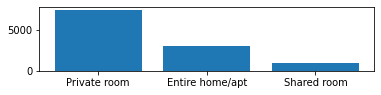

In [12]:
#El análisis de las salas muestra que la mayoría de ellas se alquilan en conjunto, y pocas salas públicas se alquilan.
plt.subplot(311)
data = datos['room_type'].value_counts().tolist()
a = datos['room_type'].unique()
plt.bar(x=a, height=data)

In [13]:
#Se puede ver que host_name está relativamente concentrado, lo que puede confirmar la conclusión extraída en las listas de host_calculadas en el tipo continuo anterior.Vamos a verlo en detalle.
datos[['host_name','name']].groupby('host_name').count().sort_values(by='name', ascending=False)

name
host_name                 
M-1 Tokyo              133
Hiroshi                103
Hiro                    78
Yuka                    77
Plays                   76
...                    ...
Claude                   1
Cissy                    1
Tamotsu                  1
Kiyoko                   1
Rei & Hikaru & Kaoru     1

[2055 rows x 1 columns]

In [14]:
#La ubicación de la casa de familia está relativamente concentrada, aquí hay una mirada específica a las áreas
datos['neighbourhood'].value_counts()

Shinjuku Ku            1882
Taito Ku               1670
Toshima Ku             1228
Sumida Ku               879
Shibuya Ku              854
Ota Ku                  598
Minato Ku               551
Chuo Ku                 448
Setagaya Ku             305
Suginami Ku             299
Nakano Ku               290
Katsushika Ku           280
Arakawa Ku              279
Itabashi Ku             237
Kita Ku                 217
Edogawa Ku              201
Chiyoda Ku              198
Adachi Ku               172
Shinagawa Ku            170
Koto Ku                 152
Bunkyo Ku               129
Meguro Ku                84
Nerima Ku                62
Hachioji Shi             37
Machida Shi              24
Oshima Machi             22
Nishitokyo Shi           19
Musashino Shi            18
Hino Shi                 17
Mitaka Shi               13
Akiruno Shi              12
Higashimurayama Shi      12
Chofu Shi                11
Kokubunji Shi             9
Kodaira Shi               8
Hachijo Machi       

In [15]:
datos['neighbourhood'].value_counts().index[0]

'Shinjuku Ku'

### La mayoría de las casas se concentran en el distrito de 'Shinjuku Ku', 'Taito Ku' y 'Toshima Ku'  .
### El tipo de habitación se basa básicamente en todo el grupo, complementado con una habitación individual, hay menos habitaciones para varias personas

## Explorar Metas
#### 1.Región (distribución, precio)
#### 2.Casas de familia (top 10 casas de familia más populares, cuáles son las características de las casas de familia más populares)
#### 3.Perspectiva del arrendador (clasificación de los tipos de arrendadores, estimaciones de los ingresos de los arrendadores)

In [16]:
token = 'pk.eyJ1Ijoid2VubGxhIiwiYSI6ImNsNnhmcjFmcjBzbjQzZHFsNXB3YXc0cHAifQ.Yhi8lAIuVUiXA8TltkAMIw'
px.set_mapbox_access_token(token)

fig = px.scatter_mapbox(datos,
                        lat=datos['latitude'],
                        lon=datos['longitude'],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=9
                       )
fig.show()
fig.write_html('tokyo_airbnb.html')

In [17]:
values = datos.neighbourhood.value_counts()
names = datos.neighbourhood.unique().tolist()
fig = px.pie(datos, values=values, names=names, title='Mapa distribución zona B&B')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Descubre explorando:

#### 1. Más del 60 % de las celebridades se concentran en las tres áreas centrales de Tokyo, el distrito de 'Shibuya Ku', 'Sumida Ku' y 'Nerima Ku'.
#### 2. Para las áreas alrededor del distrito de  'Shibuya Ku', 'Sumida Ku' y 'Nerima Ku', la distribución de casas de familia también está cerca de los límites de estas tres áreas, especialmente 'Setagaya Ku' y 'Arakawa Ku'.
#### 3. Las áreas restantes están distribuidas de manera relativamente uniforme y no hay un centro obvio.

<AxesSubplot:xlabel='price', ylabel='Count'>

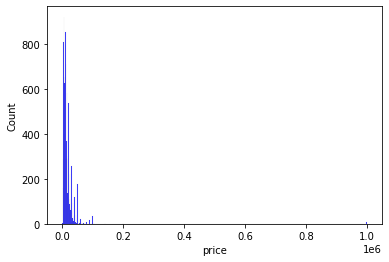

In [18]:
#A continuación, continuaremos observando si el precio de las habitaciones en diferentes áreas será diferente
#Para evitar la interferencia de algunos valores atípicos, verifiquemos la distribución de precios antes de realizar un procesamiento razonable
sns.histplot(datos['price'],color='b')

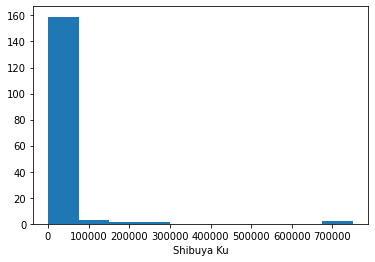

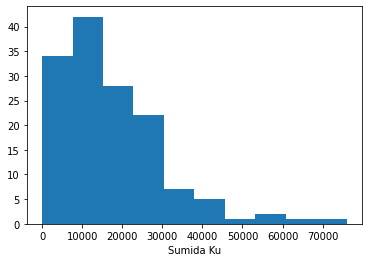

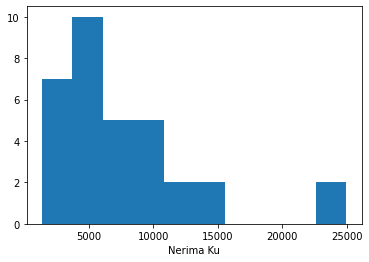

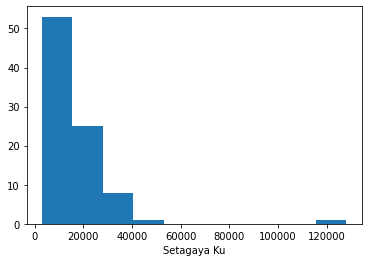

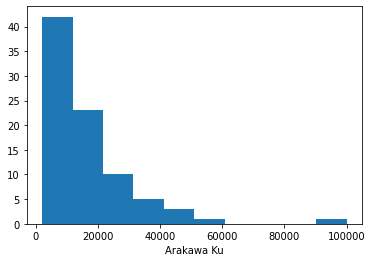

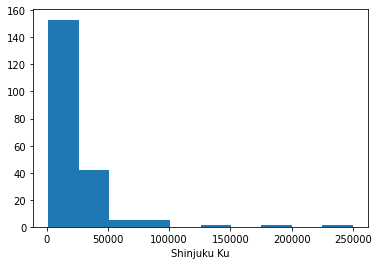

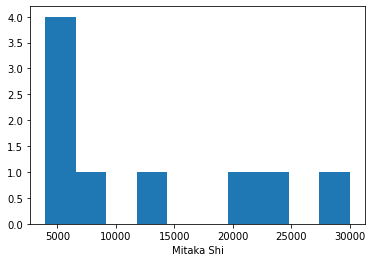

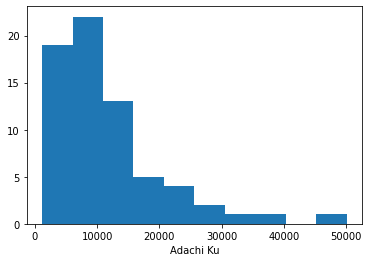

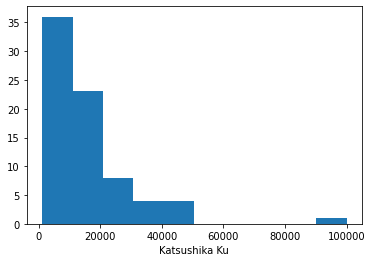

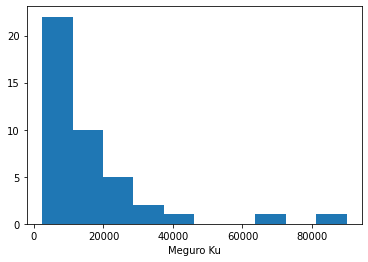

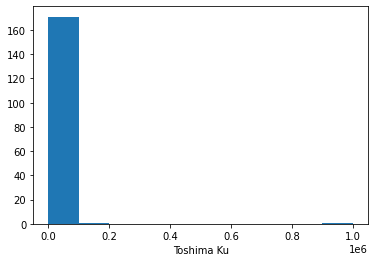

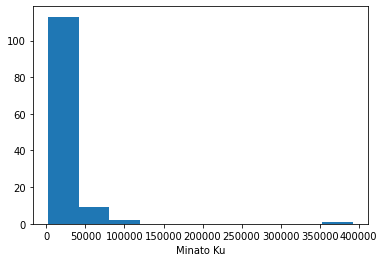

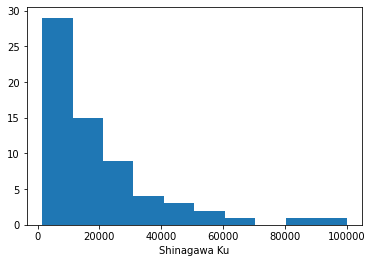

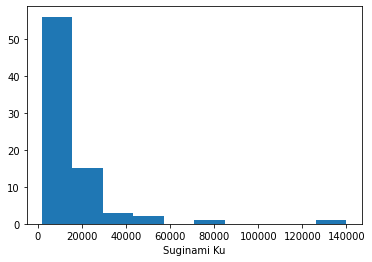

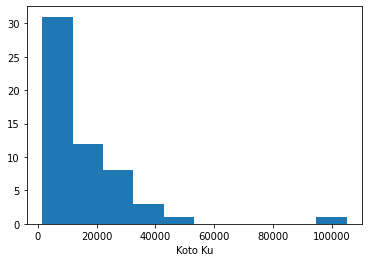

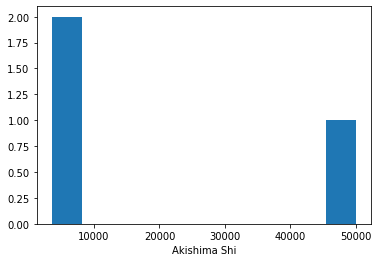

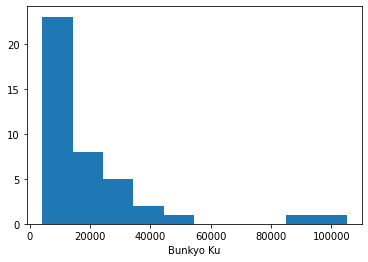

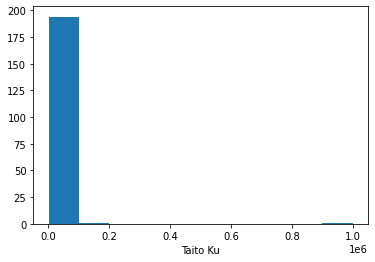

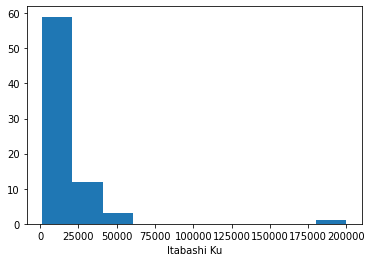

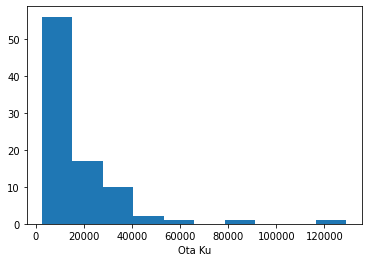

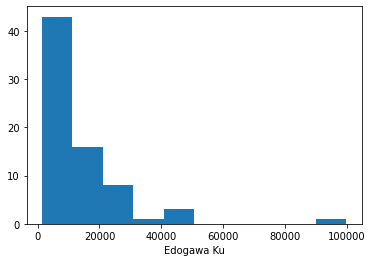

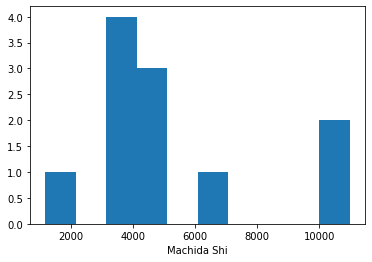

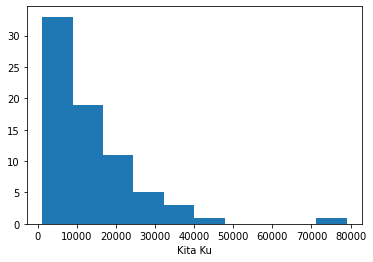

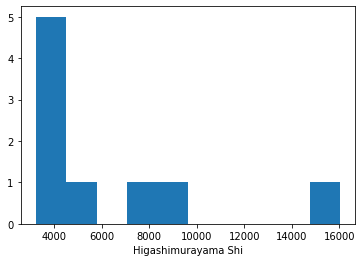

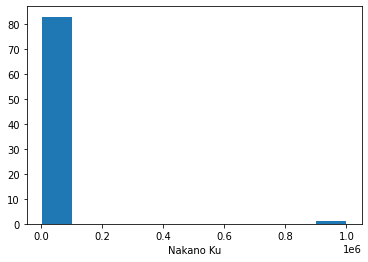

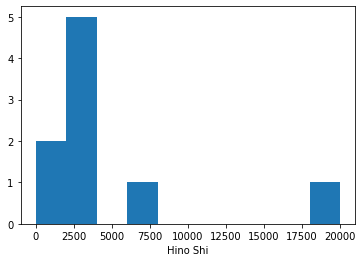

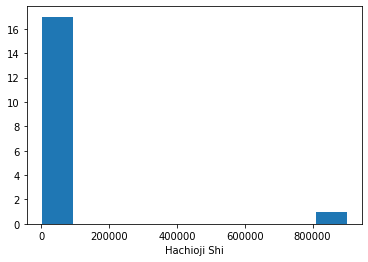

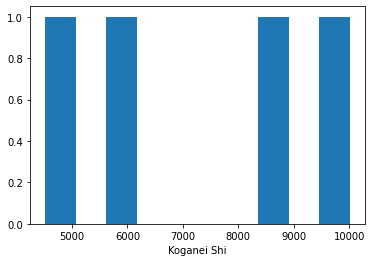

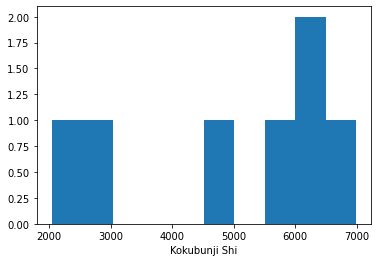

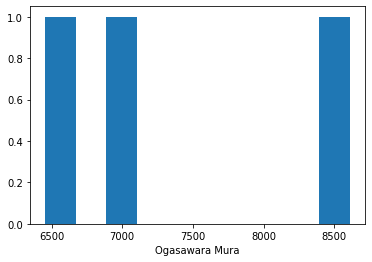

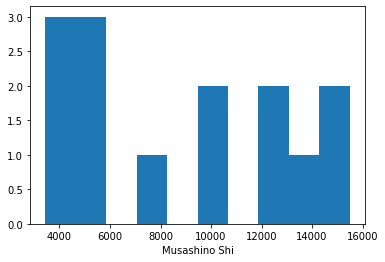

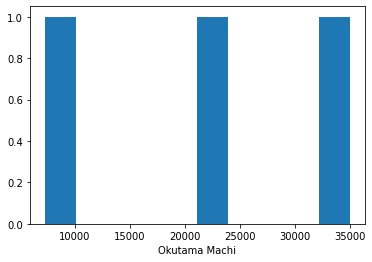

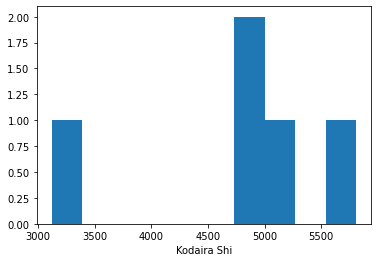

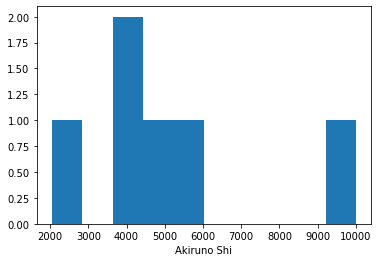

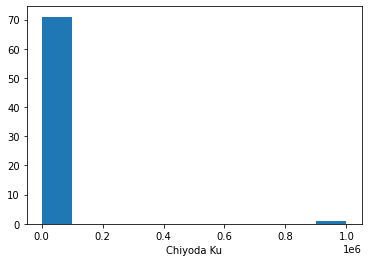

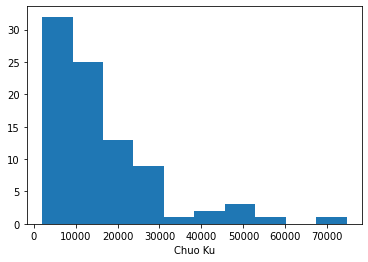

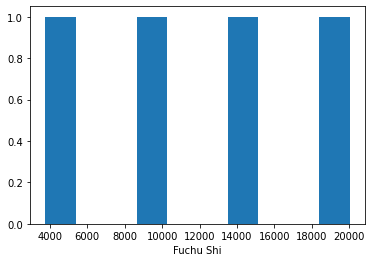

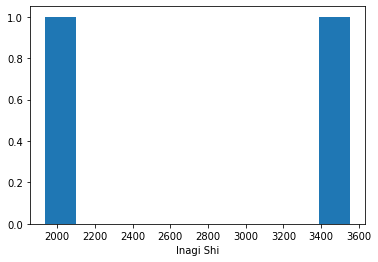

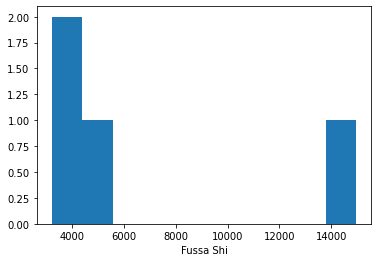

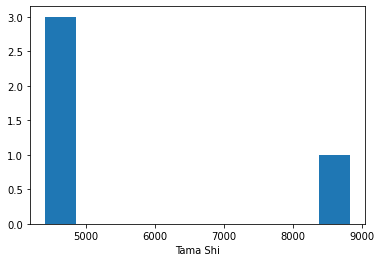

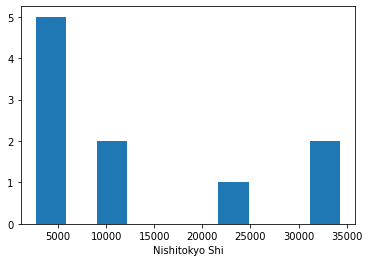

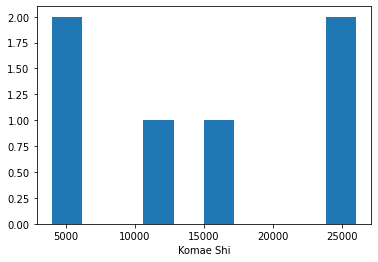

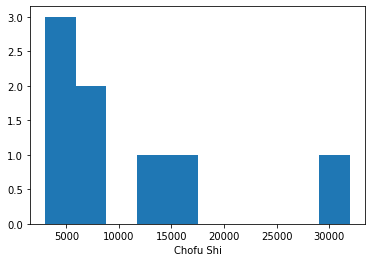

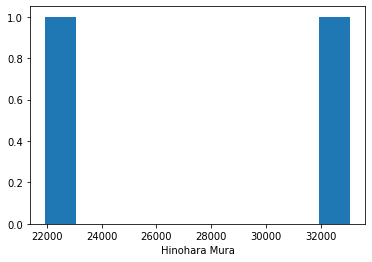

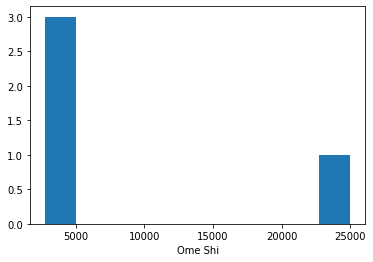

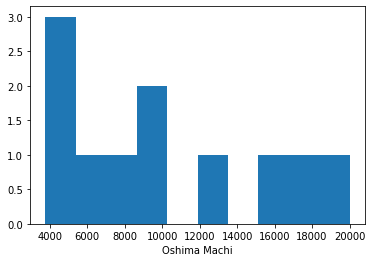

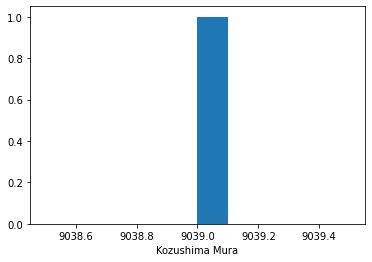

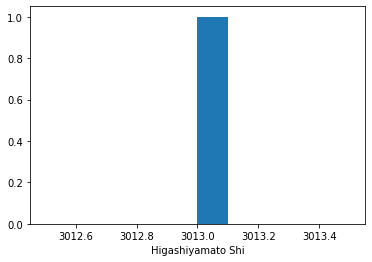

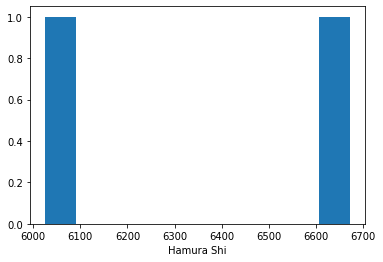

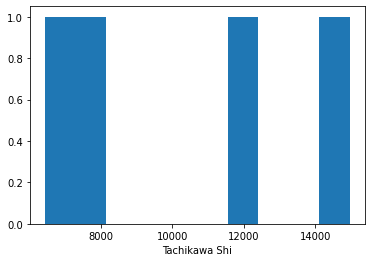

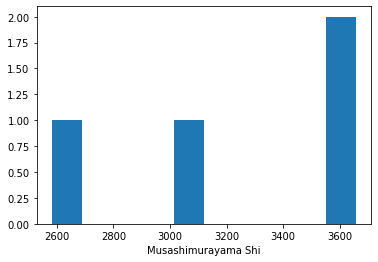

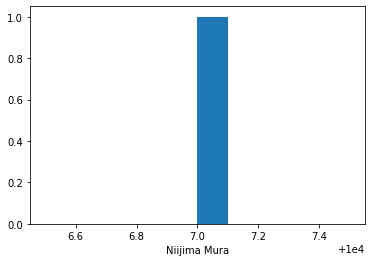

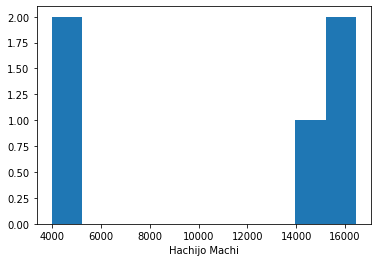

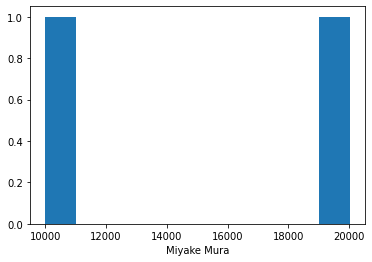

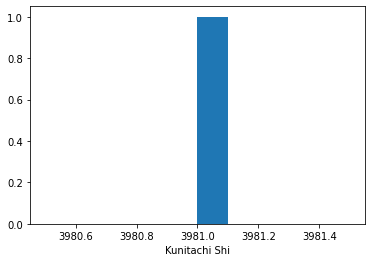

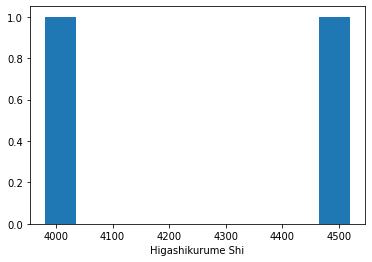

In [19]:
#Consulta los precios en cada región
a = datos[['neighbourhood','price']].groupby(['neighbourhood','price']).count().reset_index()
for i in names:
    plt.hist(a[a['neighbourhood']==i].price)
    plt.xlabel(i)
    plt.show()

In [20]:
b = pd.DataFrame(datos['neighbourhood'].unique(),columns=['área'])
b['precio alto'] = datos[['price','neighbourhood']].groupby('neighbourhood').max().price.tolist()
b['precio bajo'] = datos[['price','neighbourhood']].groupby('neighbourhood').min().price.tolist()
b['precio mediano'] = datos[['price','neighbourhood']].groupby('neighbourhood').median().price.tolist()
b['25% de precio'] = datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.25).price.tolist()
b['75% de precio'] = datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()
b['cuartil'] = np.array(datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()) - np.array(datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.25).price.tolist())
b

área  precio alto  precio bajo  precio mediano  \
0            Shibuya Ku        50035         1184          5972.0   
1             Sumida Ku        10007         2044          4519.0   
2             Nerima Ku        50035         3551          3874.0   
3           Setagaya Ku        99962         2044          9039.0   
4            Arakawa Ku       105019         4089         10007.0   
5           Shinjuku Ku      1000046         1506         12482.0   
6            Mitaka Shi        31958         3013          6994.0   
7             Adachi Ku        74568         2044         12051.0   
8         Katsushika Ku        99962         1399          8500.0   
9             Meguro Ku        20014         3766         12374.5   
10           Toshima Ku        14957         3228          3443.0   
11            Minato Ku        16463         3981         14957.0   
12         Shinagawa Ku       899977         2905          6026.0   
13          Suginami Ku         6671         6026          6026.0   
14              Koto Ku         4519         3981          4250.0   
15         Akishima Shi        16033         3228          4842.0   
16            Bunkyo Ku         3013         3013          3013.0   
17             Taito Ku        20014            0          2582.0   
18          Itabashi Ku        33034        21951         27492.5   
19               Ota Ku         3551         1937          2744.0   
20           Edogawa Ku       200031         1184          6994.0   
21          Machida Shi        99962         1184          9899.5   
22              Kita Ku        78979         1076          7962.0   
23  Higashimurayama Shi         5810         3120          5057.5   
24            Nakano Ku        10007         4519          7263.0   
25             Hino Shi         6994         2044          4519.0   
26         Hachioji Shi        26039         3981         14042.0   
27          Koganei Shi       105019         1506          9361.0   
28        Kokubunji Shi         9039         9039          9039.0   
29       Ogasawara Mura         3981         3981          3981.0   
30        Musashino Shi        10975         1184          4304.0   
31        Okutama Machi        89955         2367         10652.5   
32          Kodaira Shi       392206         2475         12051.0   
33          Akiruno Shi        30021         3981          6564.0   
34           Chiyoda Ku        20014        10007         15010.5   
35              Chuo Ku         3658         2582          3551.0   
36            Fuchu Shi        15495         3443          8715.5   
37            Inagi Shi      1000046         2475         10975.0   
38            Fussa Shi        24963         1399          5810.5   
39             Tama Shi        10007        10007         10007.0   
40       Nishitokyo Shi        34325         2690          3981.0   
41            Komae Shi         8608         6456          6456.0   
42            Chofu Shi        34970         7317         21951.0   
43        Hinohara Mura        24963         2798          3551.0   
44              Ome Shi        20014         3766          7962.0   
45         Oshima Machi       129121         2582          7962.0   
46       Kozushima Mura       128045         3013          8931.0   
47    Higashiyamato Shi       749980         1076         14365.0   
48           Hamura Shi        99962         1506         10007.0   
49        Tachikawa Shi       249958         1506         12051.0   
50  Musashimurayama Shi       139989         1937          7532.0   
51         Niijima Mura        75966            0         12051.0   
52        Hachijo Machi        14957         6456          7962.0   
53          Miyake Mura      1000046         1399         10007.0   
54        Kunitachi Shi         8823         4412          4734.5   
55    Higashikurume Shi      1000046         1506         10007.0   

    25% de precio  75% de precio   cuartil  
0         2743.75       10007.00   7263.

In [21]:
b['precio mediano'].max()

27492.5

### Del análisis anterior, se puede concluir que
#### 1.El precio de las casas de familia en Shinagawa Ku es generalmente el más alto (89955.0), seguido de Katsushika Ku (50035.0), y el tercero es Hinohara Mura (28460.5), y los precios de estas tres áreas están ampliamente distribuidos.
#### 2.Sumida Ku, Shibuya Ku y Katsushika Ku, que tienen la mayor cantidad de casas de familia, tienen un precio de alrededor de 7.000, lo que explica en cierta medida la razón de la gran cantidad de casas de familia en la región.
#### 3.Hay una gran diferencia entre el precio más alto y el precio más bajo en cada área, y el precio más alto en algunas áreas supera el millón de yuanes. No está claro si es un valor anormal o si el precio de la casa de familia en sí es tan alto. puede analizarse más a fondo en el área de grandes conjuntos de datos.

## Airbnb
### *top10 más populares
### *¿Por qué es el más popular?

In [22]:
# Aquí, por el momento, creemos que una reseña representa a un huésped, y aquellos con una reseña promedio/revisión mensual superior al 75 % de los dígitos son los B&B más populares.
avg_review = datos['number_of_reviews'].quantile(0.9)
avg_month_review = datos['reviews_per_month'].quantile(0.9)
print(avg_review)
print(avg_month_review)

70.0
4.05


In [23]:
popular_house = datos[(datos['number_of_reviews']>avg_review) & (datos['reviews_per_month']>avg_month_review)]
popular_house.sort_values(by=['number_of_reviews','reviews_per_month'],ascending=False).head(10)

id                                               name    host_id  \
5290  27750681     LICENSED SHINJUKU APARTMENT: 2 mins from metro   20833491   
95     4050925  Airport pick-up service&Asakusa traditional house   21004633   
304    7273219                      Ikeda House "Doraemon's Home"   38079831   
17     1298200         2 Bed Room + 2 Toilets + Free Pocket Wi-Fi    6606987   
2421  21015730   A cozy private space! Mixed Dormitory with Wi-Fi  150672186   
61     3265059                  Factory Roof-Top! +Portable Wi-Fi    6606987   
98     4222643                                    Decoboco hanare   21769906   
120    4713042     comfortable  stay (Blue  Sky ) + pocket wifi:)   24230913   
166    5407938         Heart of Shinjuku/Free Pocket Wifi/Homey^^   28035085   
303    7248668           ★Shibuya area♪Excellent access♪Free wifi   37125699   

                 host_name  neighbourhood  latitude  longitude  \
5290                 David    Shinjuku Ku  35.69768  139.70627   
95                   Yoshi       Taito Ku  35.71648  139.79926   
304                Tomoaki    Shinjuku Ku  35.68982  139.72827   
17                   K & N  Katsushika Ku  35.73850  139.85167   
2421  ｸﾞﾘｯｽﾞ東京浅草橋 ﾎﾃﾙ&ﾎｽﾃﾙ       Taito Ku  35.69894  139.78186   
61                   K & N  Katsushika Ku  35.73937  139.85173   
98                Decoboco        Koto Ku  35.68154  139.81747   
120                   Yuni     Arakawa Ku  35.72825  139.77863   
166                 Koichi    Shinjuku Ku  35.69518  139.70980   
303               Masayuki     Shibuya Ku  35.68279  139.70702   

            room_type  price  minimum_nights  number_of_reviews last_review  \
5290  Entire home/apt  13988               1                453  2019-06-26   
95    Entire home/apt  40028               1                417  2019-06-15   
304      Private room   6456               1                409  2019-06-24   
17    Entire home/apt  13020               2                306  2019-06-23   
2421      Shared room   2152               1                298  2019-06-27   
61       Private room   5488               2                296  2019-06-23   
98    Entire home/apt   7962               2                293  2019-06-17   
120   Entire home/apt   9469               3                274  2019-06-14   
166   Entire home/apt  12051               3                265  2019-06-21   
303   Entire home/apt  30021               1                262  2019-06-16   

      reviews_per_month  
5290              45.15  
95                 7.24  
304                8.52  
17                 4.19  
2421              17.67  
61                 4.83  
98                 5.10  
120                5.01  
166                5.11  
303                5.51

### La mayoría de las casas de familia más populares están en Shinjuku Ku (4 casas), algunas están en Katsushika Ku y Katsushika Ku y Taito Ku (2 cada una).
### Las 10 casas de familia más populares son Entire. Se considera temporalmente que si desea hacer casas de familia, el Entire puede ser una buena opción.